<a href="https://colab.research.google.com/github/so-nafy/Projet-Group-DLearning/blob/main/Projet_Groupe6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import os
import random
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
import PIL
from tensorflow import keras
from PIL import Image
import tensorflow as tf

import shutil
import random
import glob
from time import time
import shutil
import glob

import os
import numpy as np
import pandas as pd
import cv2
from PIL import ImageFile
import matplotlib.pyplot as plt                        
%matplotlib inline

## Import pr la construction du NN avec API functional 
import tensorflow 
print(tensorflow.__version__)
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras import layers

## Import pr le tuning 
# Petit Passage secret entre tf et sklearn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV



2.4.1


In [ ]:
os.getcwd()
os.chdir(r'/content/drive/MyDrive/Projet_movie')
os.getcwd()

'/content/drive/MyDrive/Projet_movie'

In [ ]:
train_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 3
img_height = 200
img_width = 200
train_data = tf.keras.preprocessing.image_dataset_from_directory(
"Train",
validation_split=0.2,
subset="training",
seed=42,
image_size=(img_height, img_width),
batch_size=batch_size,
)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
"Valid",
validation_split=0.2,
subset="validation",
seed=42,
image_size=(img_height, img_width),
batch_size=batch_size)

class_names = val_data.class_names
print(class_names)


Found 3504 files belonging to 20 classes.
Using 2804 files for training.
Found 6239 files belonging to 23 classes.
Using 1247 files for validation.
['1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = train_datagen.flow_from_directory(
    'Train', # path du train 
    target_size=(150, 150), 
    subset="training",
    batch_size=20, 
    class_mode= 'binary'
)

Found 3504 images belonging to 20 classes.


In [ ]:
val_gen = val_datagen.flow_from_directory(
    'Valid', # path du train 
    target_size=(150, 150), 
    subset="training",
    batch_size=20, 
    class_mode= 'binary'
)

Found 6239 images belonging to 23 classes.


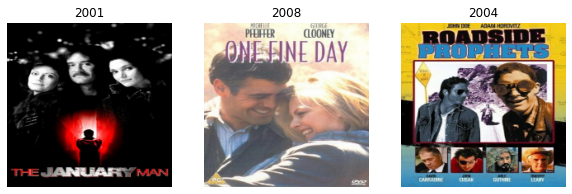

In [ ]:
#Affichage 

import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
   # plt.tight_layout()
    #plt.show()

In [ ]:
#Création du modèle CNN

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
#Entrainement du model

In [ ]:
#Creation du modele 
num_classes = 5

model = Sequential([
 layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
 layers.Conv2D(16,3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32,3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64,3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes,activation='softmax')

])    

inputs = tf.keras.layers.Input(shape=(2, ))                                      

In [ ]:
inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_224 (Conv2D)          (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 17, 17, 64)        0   

In [ ]:
# Ds le cadre du df data2 : x1, x2 comme features
inputs = tf.keras.layers.Input(shape=(2, ))

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['acc'], 
              optimizer='rmsprop')

In [ ]:
history = model.fit(train_gen, epochs=2, steps_per_epoch=100, 
          validation_data=val_gen, validation_steps=50)

Epoch 1/2
100/100 [==============================] - 172s 2s/step - loss: -53761907.8033 - acc: 0.0275 - val_loss: -1223258240.0000 - val_acc: 0.0320
Epoch 2/2
100/100 [==============================] - 149s 1s/step - loss: -2755532314.6139 - acc: 0.0232 - val_loss: -16387063808.0000 - val_acc: 0.0320


In [ ]:
tf.keras.models.save_model(model,'my_model1.hdf5')

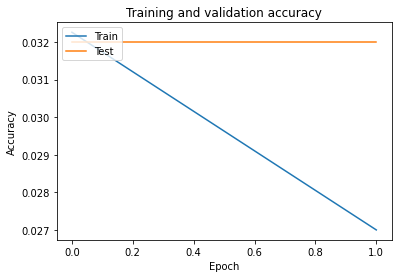

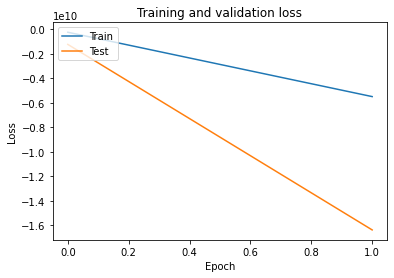

In [ ]:
# Plot training & validation accuracy values
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure()

# Plot training & validation loss values
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
print(max(val_acc))

0.03200000151991844


In [ ]:
Transfer Learning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/Projet_movie/Train'

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 64
CLASS_NUM = 120

# Training IDG
train_idg = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=0.1, 
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2)

# Training Gen
train_gen = train_idg.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)

# Test IDG
test_idg = ImageDataGenerator(rescale=1./255)

# Test Gen
test_gen = train_idg.flow_from_directory(
        TRAINING_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True,
        class_mode='categorical',
        subset='validation'
)

Found 2810 images belonging to 20 classes.
Found 694 images belonging to 20 classes.


Found 2810 images belonging to 20 classes.


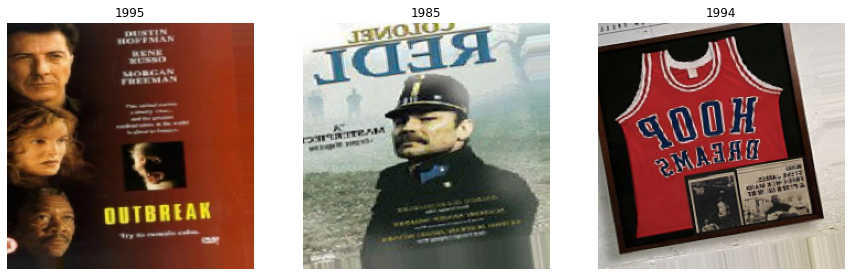

In [ ]:
# Iteration
aug_iter = train_idg.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    subset='training'
)

# montrer image horizontal
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# obtiene los labels de las clases de flow from directory
def getLabel(index):
    return (list(aug_iter.class_indices.keys())[list(aug_iter.class_indices.values()).index(index)])

# 3 images
for i in range(3):
    
    obj = next(aug_iter)
    
    # index
    class_index = np.argmax(obj[1])
    
    # image generator
    image = obj[0]

    # 3 images
    ax[i].imshow(image.reshape(IMG_SIZE, IMG_SIZE, 3))
    ax[i].set_title(getLabel(class_index))
    ax[i].axis('off')

In [ ]:

# === InceptionV3 CNN Model ===================
base_model = keras.applications.InceptionV3(
    weights = 'imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False
# === InceptionV3 CNN Model ===================

# Architecture
x = base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(CLASS_NUM, activation='softmax')(x)

# modele
model = keras.Model(base_model.input, outputs)

for layer in base_model.layers:
    layer.trainable = False

# complier le modele
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_227 (Conv2D)             (None, 111, 111, 32) 864         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_192 (BatchN (None, 111, 111, 32) 96          conv2d_227[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_192[0][0]    
____________________________________________________________________________________________

In [ ]:
#Prediction

In [ ]:

from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [ ]:
### returns "True" if a movie is detected in the image stored at img_path
def movie_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

In [ ]:
def predict_by_filename(Train_):
  in_file = 'in/'+Train
processed_file = 'in/processed_'+Train

 # Lecture
img = Image.open(in_file)

 #. Affichage de l'image avec plt
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

 # Resize de l'image
img = img.convert('RGB')
img = img.resize((224, 224))
img.save(processed_file)

 # Preprocessing
img = mpimg.imread(processed_file)
img = preprocess_input(img)

 # Affichage du nom du fichier
print("Image : "+filename)

 #Appel au model et prediction
start_time_pred = time.time()
probas = model.predict(np.expand_dims(img, axis=0))
exec_time_pred = round((time.time() - start_time_pred), 2)

 # Formatage et affichage des 3 meilleures prédictions
print("\nPredictions : ")
for idx in probas.argsort()[0][::-1][:3]:
  print("{:.2f}%".format(probas[0][idx]*100), "\t", label_maps[idx].split("-")[-1])

 # Nettoyage
os.remove(processed_file)
print('\nDurée du model.predict() : '+str(exec_time_pred)+'s')
print('\n--------------------------------------------------\n')

NameError: ignored